# Лекция 5: Визуализация данных

__Автор: Сергей Вячеславович Макрушин, 2022 г.__

e-mail: s-makrushin@yandex.ru 

V 0.3 09.10.2022

In [176]:
# !conda info

## Разделы: <a class="anchor" id="разделы"></a>

* [Matplotlib](#matplotlib)
    * [Введение в Matplotlib](#plot_intro)
    * [Оформление осей](#plot_ax)    
    * [Pyplot vs. объектно-ориентированный интерфейс matplotlib](#plot_ooi)        
    * [Цвета и оформление графических элементов](#plot_design)            
        * [Цвета в matplotlib](#plot_color)
        * [Цветовые карты в Matplotlib](#plot_colormaps)    
        * [Стили линий и маркеры](#plot_style)    
    * [Управление Figure и множество графиков на одном рисунке](#plot_fig)
    * [Различные типы графиков ](#plot_types)
* [Визуализация с помощью Pandas](#pandas)    
* [Разведочный анализ данных и визуализация с помощью Seaborn](#dea)    
    * [Знакомство с разведочным анализом данных](#dea_intro)    
    * [Анализ распределения](#distr)    
    * [Анализ взаимного распределения и парных корреляций](#outl)

-

# Визуализация данных в Pyton

# Matplotlib <a class="anchor" id="matplotlib"></a>
* [к оглавлению](#разделы)

## Введение в Matplotlib <a class="anchor" id="plot_intro"></a>
* [к оглавлению](#разделы)

Matplotlib — это базовая библиотека для построения графиков на языке программирования Python. 
Matplotlib:
* самый известный инструмент среди пакетов визуализации Python 
* обладает обширным универсальным функционалом, в частности, поддерживает наиболее распространенные  типы визуализации:
    * линейный график
    * точечный график
    * гистограмму
    * диаграммы ошибок
    * круговую диаграмму
    * ящичковую диаграмму 
    * и многие другие типы графиков, в частности 3D-графики.
* ориентирован на работу с данными представленными в виде массивов NumPy.
* многие элементы программного интерфейса Matplotlib построены по аналогии с MATLAB

In [192]:
# Классический способ импорта matplotlib:
import matplotlib
import matplotlib.pyplot as plt

In [193]:
import numpy as np
import pandas as pd

Магическая функция `%matplotlib inline` устанавливает бэкенд matplotlib в варианте `inline`. 
С помощью этого бэкенда выходные данные команд построения отображаются встроенными во внешние интерфейсы, такие как Jupyter блокнот, непосредственно под ячейкой кода, которая их создала.

IPython имеет набор «магических функций», которые вы можете вызывать с помощью синтаксиса в стиле командной строки (магические функции начинаются с `%` - для одной строки, и с `%%` для всей ячейки).

В Jupyter notebook есть вариант установить бэкенд `%matplotlib notebook`, который позволяет использовать интерактивный бэкенд для визуализации графиков внутри ноутбука.

In [194]:
%matplotlib inline

__Оргнизация графиков в Matplotlib__

<center>         
    <img src="./img/L5_fig1.png" alt="" style="width: 300px;"/>
    <b>Организация рисуноков Matplotlib</b>
</center>

* Figure - рисунок, который в общем случае может включать несколько графиков.
* Axes - график, со своей системой кординат и способ отображения информации.
* Axis - оси, относящиеся к своей системе координат.

<center>         
    <img src="./img/L5_fig5.png" alt="" style="width: 500px;"/>
    <b>Добавление системы координат (axes) на рисунок (figure) Matplotlib</b>
</center>
</br>

In [195]:
# подготавливаем данные для рисования:
x = np.linspace(0, 5, 20)
y1 = x ** 2
y2 = x ** 3
y3 = np.exp(x)

In [196]:
x

array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
       1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
       2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
       3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [197]:
y1

array([ 0.        ,  0.06925208,  0.27700831,  0.6232687 ,  1.10803324,
        1.73130194,  2.49307479,  3.3933518 ,  4.43213296,  5.60941828,
        6.92520776,  8.37950139,  9.97229917, 11.70360111, 13.5734072 ,
       15.58171745, 17.72853186, 20.01385042, 22.43767313, 25.        ])

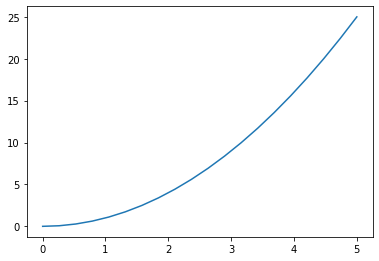

In [198]:
# создаем рисунок:
fig = plt.figure()
# создаем систему координат с выбранными отступами и размерами:
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # отступы: left, bottom; размеры: width, height (range 0 to 1)
# рисуем линейный график:
ax.plot(x, y1)

__Оформление графика на axis__

<center>         
    <img src="./img/L5_fig4.png" alt="" style="width: 700px;"/>
    <b>Организация системы координат (axes) Matplotlib</b>
</center>

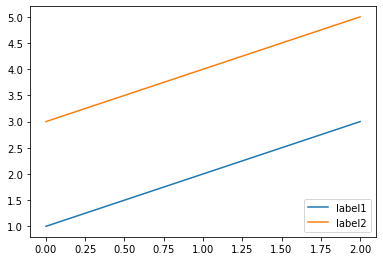

In [200]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

# рисуем линейные графики с заданными названиями:
line1, = ax.plot([1, 2, 3], label='label1')
line2, = ax.plot([3, 4, 5], label='label2')
# добавляем на систему координат легенду:
ax.legend(handles=[line1, line2], loc='lower right')
# варинты для loc: 'upper left', 'upper right', 'lower left', 'lower right'
# 'upper center', 'lower center', 'center left', 'center right'
# 'center', 'best'

### Оформление осей <a class="anchor" id="plot_ax"></a>
* [к оглавлению](#разделы)

Text(0.5, 1.0, 'Графики функций $x^2$, $x^3$ и $e^x$')

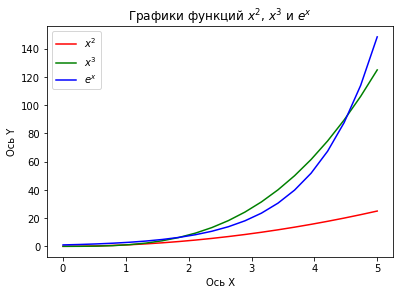

In [201]:
# создаем рисунок:
fig = plt.figure()
# создаем систему координат с выбранными отступами:
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)

# рисуем график:
# * plot() возвращает список объектов которые можно исопльзовать для построения 
# * в лейблах можно использовать формулы на latex
# * явно определяем цвета графиков ('r', 'g', ...)
y1_line, = ax.plot(x, y1, 'r', label = '$x^2$')
y2_line, = ax.plot(x, y2, 'g', label = '$x^3$')
y3_line, = ax.plot(x, y3, 'b', label = '$e^x$')


ax.set_xlabel('Ось X')
ax.set_ylabel('Ось Y')
ax.legend(handles=[y1_line, y2_line, y3_line])
ax.set_title('Графики функций $x^2$, $x^3$ и $e^x$')

Задание логарифмического масштаба оси:

Text(0.5, 1.0, 'Графики функций $x^2$, $x^3$ и $e^x$')

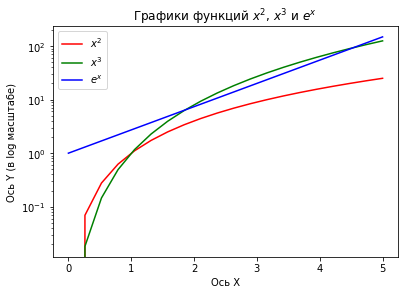

In [202]:
# создаем рисунок:
fig = plt.figure()
# создаем систему координат с выбранными отступами:
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) 

# рисуем график:
y1_line, = ax.plot(x, y1, 'r', label = '$x^2$')
y2_line, = ax.plot(x, y2, 'g', label = '$x^3$')
y3_line, = ax.plot(x, y3, 'b', label = '$e^x$')

# -------------------
# определяем логарифмическую шкалу для оси Y:
ax.set_yscale("log")
ax.set_ylabel('Ось Y (в log масштабе)')

ax.set_xlabel('Ось X')

# -------------------
ax.legend(handles=[y1_line, y2_line, y3_line])
# в лейблах можно использовать формулы на latex:
ax.set_title('Графики функций $x^2$, $x^3$ и $e^x$')

Явное определяение отображаемого дипазона:

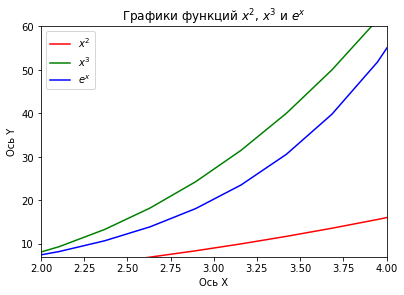

In [189]:
# создаем рисунок:
fig = plt.figure()
# создаем систему координат с выбранными отступами:
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) 

# рисуем график:
y1_line, = ax.plot(x, y1, 'r', label = '$x^2$')
y2_line, = ax.plot(x, y2, 'g', label = '$x^3$')
y3_line, = ax.plot(x, y3, 'b', label = '$e^x$')

# -------------------
# явно определяем отображаемый дипазон:
ax.set_ylim([7, 60])
ax.set_xlim([2, 4])

# -------------------
ax.set_xlabel('Ось X')
ax.set_ylabel('Ось Y')
ax.legend(handles=[y1_line, y2_line, y3_line])
ax.set_title('Графики функций $x^2$, $x^3$ и $e^x$');

С помощью `set_xticks` и `set_yticks` можно явно определить, где мы хотим делать отметки на оси. Для этого нужно передать список значений, где необходимо сделать отметки. Также можно использовать методы `set_xticklabels` и `set_yticklabels`, для чтобы предоставить список пользовательских текстовых меток для каждого значения отметки.

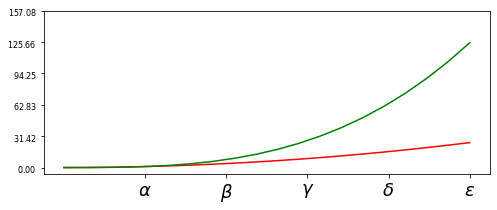

In [14]:
import math

fig, ax = plt.subplots(figsize=(8, 3)) # figsize позволяет задать размер системы координат

ax.plot(x, y1, 'r')
ax.plot(x, y2, 'g')

ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xticklabels([r'$\alpha$', r'$\beta$', r'$\gamma$', r'$\delta$', r'$\epsilon$'], fontsize=18)

yticks = np.arange(0, 60, 10) * math.pi
ax.set_yticks(yticks)
ax.set_yticklabels([f"${y:.2f}$" for y in yticks], fontsize=8); # use LaTeX formatted labels

С помощью метода grid в объекте оси мы можем включать и выключать линии сетки. Мы также можем настроить внешний вид линий сетки, используя те же аргументы, что и для функция plot.


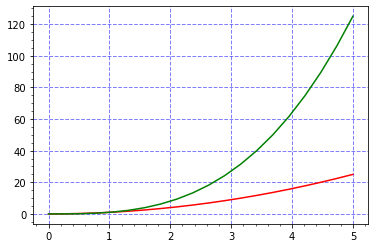

In [15]:
# настроенная визуализация сетки:
plt.plot(x, y1, 'r')
plt.plot(x, y2, 'g')

# включение дополнительных рисок:
plt.minorticks_on()

# plt.grid() # сетка по умолчанию
plt.grid(color='b', alpha=0.5, linestyle='dashed', linewidth=1)

## Pyplot vs. объектно-ориентированный интерфейс matplotlib <a class="anchor" id="plot_ooi"></a>
* [к оглавлению](#разделы)

__Интерфейс pyplot__

В matplotlib есть возможность имитировать методы MATLAB для создания графиков, с помощью `pyplot`. Все команды pyplot изменяют один и тот же график. Это интерфейс на основе состояния, в котором состояние (т. е. рисунок) определяется с помощью различных вызовов функций (т. е. методов, изменяющих рисунок). Интерфейс, основанный на состоянии, позволяет добавлять элементы и/или изменять график по мере необходимости и тогда, когда это нужно, что позволяет быстро и легко создавать графики. Этот интерфейс имеет много общего в синтаксисе и методологии с MATLAB.

In [190]:
# классический импорт, позволяющий легко работать с pyplot:
import matplotlib.pyplot as plt

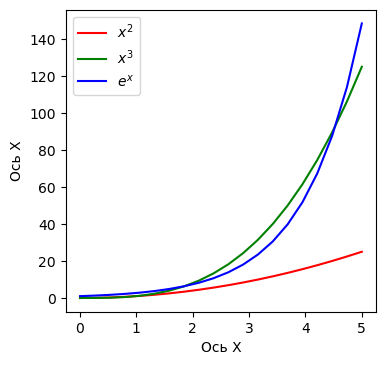

In [191]:
plt.figure(figsize=(4,4), dpi=100)
plt.plot(x, y1, 'r')
plt.plot(x, y2, 'g')
plt.plot(x, y3, 'b')

plt.xlabel('Ось X')
plt.ylabel('Ось X')

plt.legend(['$x^2$', '$x^3$', '$e^x$'])

__Объектно-ориентированный интерфейс__

Обратной стороной подхода на основе  pyplot является то, что он не масштабируется. Когда нужно сделать несколько графиков или когда нужно нарисовать сложные графики, требующие тонкой настройки, вместо __интефейса на основе состояния__ (pyplot) нужно использовать __объектно-ориентированный интерфейс__ который и залаожен в архитекутре matplotlib.

При использовании интерфейса OO полезно знать, как matplotlib структурирует свои графики. Последний график, который мы видим на выходе, представляет собой объект «Рисунок». 

* Объект `Figure` является контейнером верхнего уровня для всех остальных элементов, составляющих графическое изображение. 
* `Figure` можно рассматривать как холст, на котором работают разные художники - объекты `Artists`.
    * На холсте `Figure` может использоваться любое количество элементов `Artists`.

Text(0.5, 1.0, 'Графики функций $x^2$, $x^3$ и $e^x$')

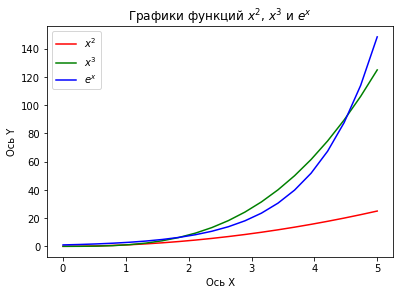

In [53]:
# создаем рисунок:
fig = plt.figure()
# создаем систему координат с выбранными отступами:
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)

# рисуем график:
# plot() возвращает список объектов которые можно исопльзовать для построения 
# явно определяем цвета графиков ('r', 'g')
y1_line, = ax.plot(x, y1, 'r', label = '$x^2$')
y2_line, = ax.plot(x, y2, 'g', label = '$x^3$')
y3_line, = ax.plot(x, y3, 'b', label = '$e^x$')


ax.set_xlabel('Ось X')
ax.set_ylabel('Ось Y')
ax.legend(handles=[y1_line, y2_line, y3_line])
# в лейблах можно использовать формулы на latex:
ax.set_title('Графики функций $x^2$, $x^3$ и $e^x$')

## Цвета и оформление графических элементов <a class="anchor" id="plot_design"></a>
* [к оглавлению](#разделы)

### Цвета в matplotlib <a class="anchor" id="plot_color"></a>
* [к оглавлению](#разделы)

In [204]:
import matplotlib.colors as mcolors

mcolors.BASE_COLORS #these colors can be called with a single character
mcolors.TABLEAU_COLORS #the default color cycle colors
mcolors.CSS4_COLORS #named colors also recognized in css
mcolors.XKCD_COLORS #named colors from the xkcd survey

print(f'Цвета кодирующиеся одной буквой:')
mcolors.BASE_COLORS

Цвета кодирующиеся одной буквой:


{'b': (0, 0, 1),
 'g': (0, 0.5, 0),
 'r': (1, 0, 0),
 'c': (0, 0.75, 0.75),
 'm': (0.75, 0, 0.75),
 'y': (0.75, 0.75, 0),
 'k': (0, 0, 0),
 'w': (1, 1, 1)}

* b: Blue - синий
* g: Green - зеленый
* r: Red - красный
* c: Cyan - бирюзовый
* m: Magenta - пурпурный
* y: Yellow - желтый
* k: blacK - черный
* w: White - белый

In [205]:
# генерация данных для визуализации цветов:
x_col = np.linspace(0, 2*np.pi)
y_col = np.sin(x_col)

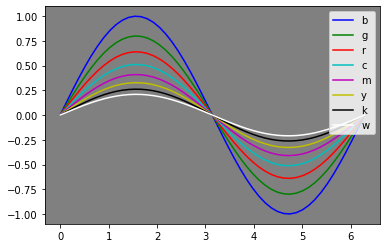

In [18]:
# обход всех однобуквенных цветов:
A = 1.

# устанавливаем серый фон:
ax = plt.gca()
ax.set_facecolor('gray')    

for color in mcolors.BASE_COLORS:
    plt.plot(x_col, A * y_col, c=color, label=color)
    A *= 0.8
plt.legend()

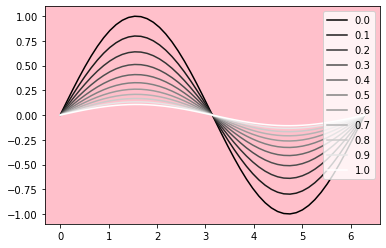

In [206]:
# В качестве цвета можно использовать строки со строковым значениями float on 0.0 до 1.0:
A = 1.

# устанавливаем розовый фон:
ax = plt.gca()
ax.set_facecolor('pink') 

N = 10
for i in range(0, N + 1):
    plt.plot(x_col, A * y_col, c=str(i/N), label=str(i/N))
    A *= 0.8
plt.legend()

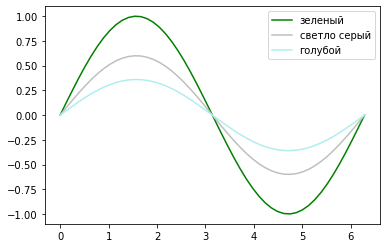

In [20]:
# В качестве цвета можно использовать картежи RGB со значениями в диапазоне от 0 до 1 и строки RGB вида ''#ffffff':':

plot_colors = {'зеленый':(0.0, 0.5, 0.0), 'светло серый':(0.75, 0.75, 0.75), 'голубой':'#afeeee'}

A = 1.
for c_lab, c in plot_colors.items():
    plt.plot(x_col, A*y_col, c=c, label=c_lab)
    A *= 0.6
plt.legend()

Цветов в цикле по умолчанию: 10


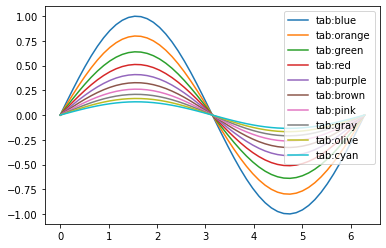

In [22]:
# Цикл цветов по умолчанию:
A = 1.
tcl = len(mcolors.TABLEAU_COLORS)
print(f'Цветов в цикле по умолчанию: {tcl}')

for color in mcolors.TABLEAU_COLORS:
    plt.plot(x_col, A * y_col, c=color, label=color)
    A *= 0.8
plt.legend()

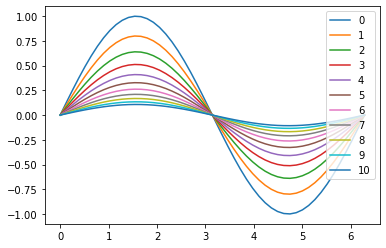

In [23]:
# Обход цикл цветов по умолчанию без их явного указания:
A = 1.

# покажем tcl + 1 график:
for i in range(tcl + 1):
    plt.plot(x_col, A * y_col, label=str(i))
    A *= 0.8
plt.legend()

<center>         
    <img src="./img/L5_col_map.png" alt="" style="width: 700px;"/>
    <b>Полная цветовая палитра именованных цветов `XKCD_COLORS`</b>
</center>

In [24]:
# Словарь именованных цветов в Matplotlib:
matplotlib.colors.cnames

{'aliceblue': '#F0F8FF',
 'antiquewhite': '#FAEBD7',
 'aqua': '#00FFFF',
 'aquamarine': '#7FFFD4',
 'azure': '#F0FFFF',
 'beige': '#F5F5DC',
 'bisque': '#FFE4C4',
 'black': '#000000',
 'blanchedalmond': '#FFEBCD',
 'blue': '#0000FF',
 'blueviolet': '#8A2BE2',
 'brown': '#A52A2A',
 'burlywood': '#DEB887',
 'cadetblue': '#5F9EA0',
 'chartreuse': '#7FFF00',
 'chocolate': '#D2691E',
 'coral': '#FF7F50',
 'cornflowerblue': '#6495ED',
 'cornsilk': '#FFF8DC',
 'crimson': '#DC143C',
 'cyan': '#00FFFF',
 'darkblue': '#00008B',
 'darkcyan': '#008B8B',
 'darkgoldenrod': '#B8860B',
 'darkgray': '#A9A9A9',
 'darkgreen': '#006400',
 'darkgrey': '#A9A9A9',
 'darkkhaki': '#BDB76B',
 'darkmagenta': '#8B008B',
 'darkolivegreen': '#556B2F',
 'darkorange': '#FF8C00',
 'darkorchid': '#9932CC',
 'darkred': '#8B0000',
 'darksalmon': '#E9967A',
 'darkseagreen': '#8FBC8F',
 'darkslateblue': '#483D8B',
 'darkslategray': '#2F4F4F',
 'darkslategrey': '#2F4F4F',
 'darkturquoise': '#00CED1',
 'darkviolet': '#9400D3

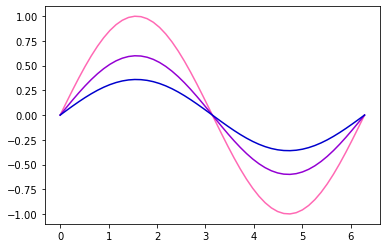

In [207]:
plot_colors = ['hotpink','darkviolet','mediumblue']
A = 1.
for c in plot_colors:
    plt.plot(x_col, A*y_col, c=c)
    A *= 0.6

In [26]:
for col in plot_colors:
    print(f'Цвет {col} в формате #FFFFFF: {matplotlib.colors.cnames[col]}')

Цвет hotpink в формате #FFFFFF: #FF69B4
Цвет darkviolet в формате #FFFFFF: #9400D3
Цвет mediumblue в формате #FFFFFF: #0000CD


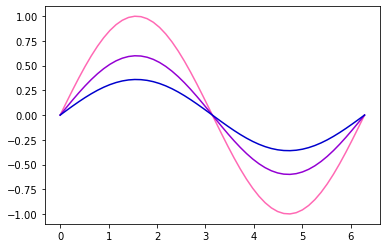

In [208]:
# коды цветов в формате #ffffff (цифры a,b,c,d,e,f должны быть в нижнем регистре!)
plot_colors = ['#ff69b4','#9400d3','#0000cd']

A = 1.
for c in plot_colors:
    plt.plot(x_col, A*y_col, c=c)
    A *= 0.6

### Цветовые карты в Matplotlib  <a class="anchor" id="plot_colormaps"></a>
* [к оглавлению](#разделы)

Matplotlib имеет ряд встроенных __цветовых карт (colormaps)__, доступных через `matplotlib.colormaps`.

Для многих приложений  однородная цветовая карта является лучшим выбором; то есть цветовая карта, в которой равные шаги в данных воспринимаются как равные шаги в цветовом пространстве.

Исследователи обнаружили, что мозг человека гораздо лучше воспринимает изменения параметра яркости как изменения данных, чем, например, изменения оттенка. Следовательно, цветовые карты, которые имеют монотонно увеличивающуюся яркость будут лучше интерпретироваться зрителем. 

Документация: https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [209]:
cmaps = {}

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(category, cmap_list):
    # Create figure and adjust figure height to number of colormaps
    nrows = len(cmap_list)
    figh = 0.35 + 0.15 + (nrows + (nrows - 1) * 0.1) * 0.22
    fig, axs = plt.subplots(nrows=nrows + 1, figsize=(6.4, figh))
    fig.subplots_adjust(top=1 - 0.35 / figh, bottom=0.15 / figh,
                        left=0.2, right=0.99)
    axs[0].set_title(f'{category} colormaps', fontsize=14)

    for ax, name in zip(axs, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=matplotlib.colormaps[name])
        ax.text(-0.01, 0.5, name, va='center', ha='right', fontsize=10,
                transform=ax.transAxes)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axs:
        ax.set_axis_off()

    # Save colormap list for later.
    cmaps[category] = cmap_list

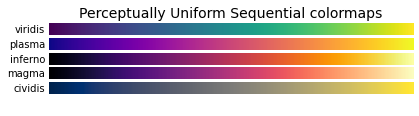

In [29]:
plot_color_gradients('Perceptually Uniform Sequential',
                     ['viridis', 'plasma', 'inferno', 'magma', 'cividis'])

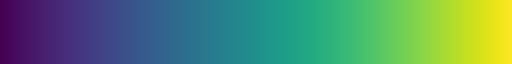

In [30]:
# Цветовая карта viridis:
matplotlib.colormaps['viridis']

In [31]:
# структура colormap:
сm_viridis = matplotlib.colormaps['viridis']
print(len(сm_viridis.colors))
[c for c in сm_viridis.colors]

256


[[0.267004, 0.004874, 0.329415],
 [0.26851, 0.009605, 0.335427],
 [0.269944, 0.014625, 0.341379],
 [0.271305, 0.019942, 0.347269],
 [0.272594, 0.025563, 0.353093],
 [0.273809, 0.031497, 0.358853],
 [0.274952, 0.037752, 0.364543],
 [0.276022, 0.044167, 0.370164],
 [0.277018, 0.050344, 0.375715],
 [0.277941, 0.056324, 0.381191],
 [0.278791, 0.062145, 0.386592],
 [0.279566, 0.067836, 0.391917],
 [0.280267, 0.073417, 0.397163],
 [0.280894, 0.078907, 0.402329],
 [0.281446, 0.08432, 0.407414],
 [0.281924, 0.089666, 0.412415],
 [0.282327, 0.094955, 0.417331],
 [0.282656, 0.100196, 0.42216],
 [0.28291, 0.105393, 0.426902],
 [0.283091, 0.110553, 0.431554],
 [0.283197, 0.11568, 0.436115],
 [0.283229, 0.120777, 0.440584],
 [0.283187, 0.125848, 0.44496],
 [0.283072, 0.130895, 0.449241],
 [0.282884, 0.13592, 0.453427],
 [0.282623, 0.140926, 0.457517],
 [0.28229, 0.145912, 0.46151],
 [0.281887, 0.150881, 0.465405],
 [0.281412, 0.155834, 0.469201],
 [0.280868, 0.160771, 0.472899],
 [0.280255, 0.16569

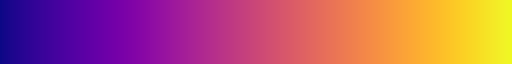

In [32]:
matplotlib.colormaps['plasma']

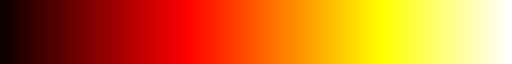

In [33]:
matplotlib.colormaps['hot']

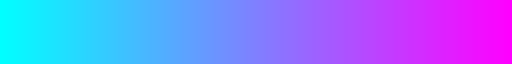

In [34]:
matplotlib.colormaps['cool']

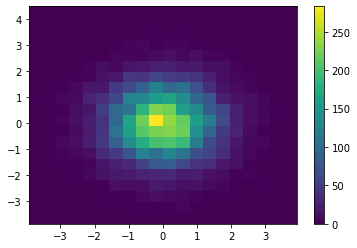

In [210]:
# Цветовая карта по умолчанию (viridis):
x_mp, y_mp = np.random.normal(size=(2, 10000))

fig, ax = plt.subplots()
H = ax.hist2d(x_mp, y_mp, bins=20)
fig.colorbar(H[3], ax=ax);

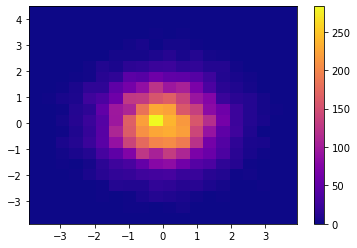

In [213]:
fig, ax = plt.subplots()
# используем цветовую карту plasma:
H = ax.hist2d(x_mp, y_mp, bins=20, cmap=plt.cm.plasma)
fig.colorbar(H[3], ax=ax)

### Стили линий и маркеры <a class="anchor" id="plot_style"></a>
* [к оглавлению](#разделы)

__Стили линий__

В matplotlib cтили линий (linestyles)  можно определить с помощью:
* Текстовых описаний (коротких или полных):
    * `-` or `solid` - сплошная линия
    * `--` or `dashed` - пунктирная линия
    * `-.` or `dashdot` - линия "трие-точка"
    * `:` or `dotted` - линия из точек
    * `None` или `' '` - не рисует ничего
* Кортежа вида `(offset, (on_off_seq))`. Например:
    * `(0, (3, 10, 1, 15))` означает (строка 3pt, интервал 10pt, строка 1pt, интервал 15pt) без смещения. 
    * `(5, (10, 3))`, означает (строка 10pt, 3pt пробел), но пропуск (смещение) на первых 5pt.

<center>         
    <img src="./img/L5_linestyles.png" alt="" style="width: 700px;"/>
    <b>Примеры стилей линий</b>
</center>

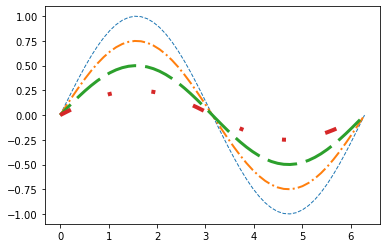

In [214]:
plt.plot(x_col, 1.*y_col, linestyle='--', linewidth=1)
plt.plot(x_col, 0.75*y_col, linestyle='dashdot', linewidth=2)
plt.plot(x_col, 0.50*y_col, linestyle=(5, (10, 3)), linewidth=3)
plt.plot(x_col, 0.25*y_col, linestyle=(0, (3, 10, 1, 10, 1, 10)), linewidth=4)

__Маркеры линий__

Кроме стилей линий для их офрмления можно использовать маркеры: 
* Короткие названия маркеров: `o`, `v`, `^`, `<`, `>`, `8`, `s`, `p`, `*`, `h`, `H`, `D`, `d`, `P`, `X`.
* Данные названия маркеров могут использоваться не только при рисовании линий с помощью `plot()`, но и в дргуих функциях рисования.

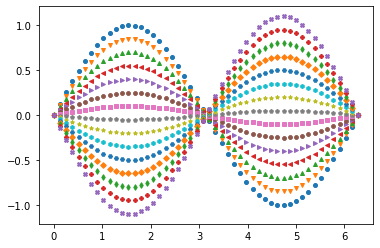

In [38]:
plot_markers = ['o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X']

A = 1.
for c in plot_markers:
    plt.plot(x_col, A*y_col, c, markersize=4)
    A -= 0.15

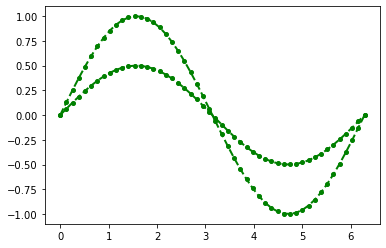

In [39]:
# альтернативные методы определения стили линий:
plt.plot(x_col, 0.5*y_col, 'go--', linewidth=2, markersize=4)
plt.plot(x_col, 1.0*y_col, color='green', marker='o', linestyle='dashed',
     linewidth=2, markersize=4)

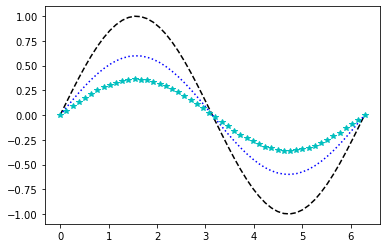

In [215]:
# примеры компактного описания стилей линии в одной строке:
plot_colors = ['k--', 'b:','c*']

A = 1.
for c in plot_colors:
    plt.plot(x_col, A*y_col, c)
    A *= 0.6

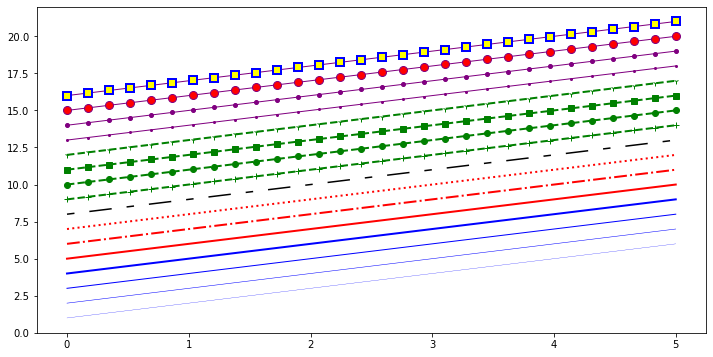

In [41]:
x_seq = np.linspace(0, 5, 30)
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(x_seq, x_seq+1, color="blue", linewidth=0.25)
ax.plot(x_seq, x_seq+2, color="blue", linewidth=0.50)
ax.plot(x_seq, x_seq+3, color="blue", linewidth=1.00)
ax.plot(x_seq, x_seq+4, color="blue", linewidth=2.00)

# possible linestype options ‘-‘, ‘–-’, ‘-.’, ‘:’, ‘steps’
ax.plot(x_seq, x_seq+5, color="red", lw=2, linestyle='-')
ax.plot(x_seq, x_seq+6, color="red", lw=2, ls='-.')
ax.plot(x_seq, x_seq+7, color="red", lw=2, ls=':')

# custom dash
line, = ax.plot(x_seq, x_seq+8, color="black", lw=1.50)
line.set_dashes([5, 10, 15, 10]) # format: line length, space length, ...

# possible marker symbols: marker = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
ax.plot(x_seq, x_seq+ 9, color="green", lw=2, ls='--', marker='+')
ax.plot(x_seq, x_seq+10, color="green", lw=2, ls='--', marker='o')
ax.plot(x_seq, x_seq+11, color="green", lw=2, ls='--', marker='s')
ax.plot(x_seq, x_seq+12, color="green", lw=2, ls='--', marker='1')

# marker size and color
ax.plot(x_seq, x_seq+13, color="purple", lw=1, ls='-', marker='o', markersize=2)
ax.plot(x_seq, x_seq+14, color="purple", lw=1, ls='-', marker='o', markersize=4)
ax.plot(x_seq, x_seq+15, color="purple", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red")
ax.plot(x_seq, x_seq+16, color="purple", lw=1, ls='-', marker='s', markersize=8, 
        markerfacecolor="yellow", markeredgewidth=2, markeredgecolor="blue");

## Управление Figure и множество графиков на одном рисунке <a class="anchor" id="plot_fig"></a>
* [к оглавлению](#разделы)

__Несколько графиков на одном рисунке__

На одном рисурке (`Figure`) в matplotlib можно расположить несколько графиков со своими системами координат (`Axes`):

<center>         
    <img src="./img/L5_fig2.png" alt="" style="width: 300px;"/>
    <b>Структура рисунка с двумя графиками </b>
</center>

<center>         
    <img src="./img/L5_fig3.png" alt="" style="width: 300px;"/>
    <b>Пример организации рисунка с тремя графиками</b>
</center>


Базовый пример с одним рисунком:

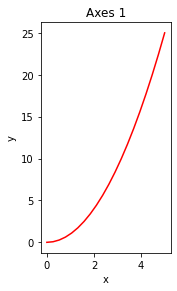

In [229]:
fig = plt.figure()

# создаем один график на рисунке fig:
ax1 = fig.add_axes([0.1, 0.1, 0.3, 0.8]) # left, bottom, width, height (range 0 to 1)

ax1.plot(x, y1, 'r')

ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Axes 1');

Пример с двумя рисунками на одном графике:

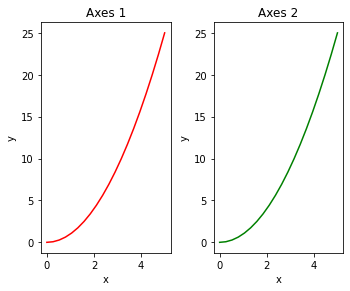

In [230]:
fig = plt.figure()

# создаем два графика на рисунке fig:
ax1 = fig.add_axes([0.1, 0.1, 0.3, 0.8]) # left, bottom, width, height (range 0 to 1)
ax2 = fig.add_axes([0.5, 0.1, 0.3, 0.8]) # left, bottom, width, height (range 0 to 1)

ax1.plot(x, y1, 'r')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Axes 1')

ax2.plot(x, y1, 'g')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Axes 2');

Ручное опредление располжение рисунков на графике позволяет создавать нестандартные графики:

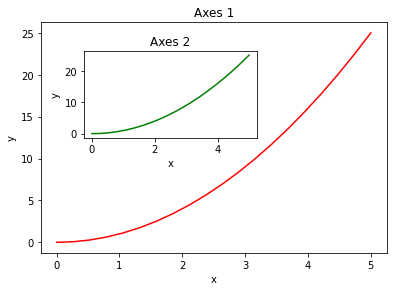

In [231]:
fig = plt.figure()

# left, bottom, width, height (range 0 to 1)
ax1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
ax2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # inset axes

ax1.plot(x, y1, 'r')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Axes 1')

ax2.plot(x, y1, 'g')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Axes 2');

Для удобного рисования нескольких графиков организованных в виде таблицы есть удобный механизм:
</br>
<center>         
    <img src="./img/L5_fig6.png" alt="" style="width: 250px;"/>
    <b>Организация системы координат Matplotlib</b>
</center>

axes:[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:>], axes type:<class 'numpy.ndarray'>, axes shape: (3,)


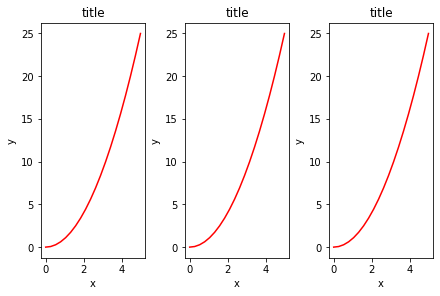

In [233]:
fig, axes = plt.subplots(nrows=1, ncols=3, layout="constrained")

print(f'axes:{axes}, axes type:{type(axes)}, axes shape: {axes.shape}')

for axi in axes:
    axi.plot(x, y1, 'r')
    axi.set_xlabel('x')
    axi.set_ylabel('y')
    axi.set_title('title')

axes:[[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]], axes type:<class 'numpy.ndarray'>, axes shape: (2, 3)


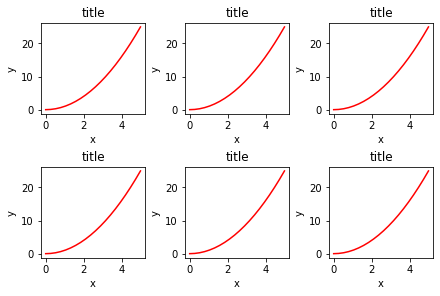

In [58]:
fig, axes = plt.subplots(nrows=2, ncols=3, layout="constrained")

print(f'axes:{axes}, axes type:{type(axes)}, axes shape: {axes.shape}')

for axi in axes:
    for axij in axi:
        axij.plot(x, y1, 'r')
        axij.set_xlabel('x')
        axij.set_ylabel('y')
        axij.set_title('title')

axes:[[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]], axes type:<class 'numpy.ndarray'>, axes shape: (2, 3)


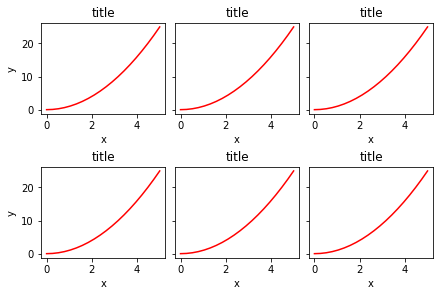

In [59]:
# Для параметров sharey и sharex можно задать значения 'row', 'col', 'all':
fig, axes = plt.subplots(nrows=2, ncols=3, layout="constrained", sharey='row')

print(f'axes:{axes}, axes type:{type(axes)}, axes shape: {axes.shape}')

for axi in axes:
    # название оси y оставили только у самого левого графика:
    axi[0].set_ylabel('y')    
    for axij in axi:
        axij.plot(x, y1, 'r')
        axij.set_xlabel('x')
        axij.set_title('title')

Две системы координат на одном рисунке:

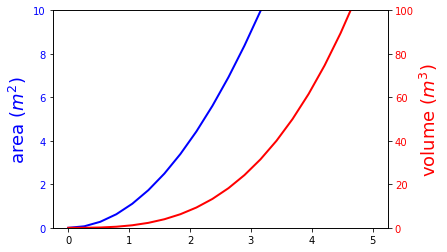

In [220]:
fig, ax1 = plt.subplots()

ax1.plot(x, y1, lw=2, color="blue")
ax1.set_ylim([0, 10])
ax1.set_ylabel(r"area $(m^2)$", fontsize=18, color="blue")
for label in ax1.get_yticklabels():
    label.set_color("blue")

# twinx
ax2 = ax1.twinx()
ax2.set_ylim([0, 100])
ax2.plot(x, y2, lw=2, color="red")
ax2.set_ylabel(r"volume $(m^3)$", fontsize=18, color="red")
for label in ax2.get_yticklabels():
    label.set_color("red")

__Задание характеристик рисунка__

__Размер фигуры (`figsize`)__ определяет размер фигуры в дюймах. Это определяет количество места для систем координат и других элементов на рисунке. 
* По умолчанию размер рисунка в matplotlib составляет `(6.4, 4.8)` дюймов. 
* Больший размер рисунка позволит отображать более длинные тексты, больше осей или больше меток.

__Количество точек на дюйм (`dpi`)__ определяет, плотность пикселей на рисунке. 
* По умолчанию в matplotlib значение dpi равно 100. 

```python
# при заданном размере рисунка:
figsize=(w,h)
# количество пикселей по x и y будет:
px, py = w*dpi, h*dpi
```

__Какая разница между увеличением рисунка и увеличением плотности пикселей?__
* Так как большинство элементов, таких как линии, маркеры, тексты, имеют размер, указанный в пунктах, то изменение размера рисунка не будет влиять на их толщину.
* И наоборот: большее значение dpi будет действовать как увеличительное стекло для всех элементов рисунка.



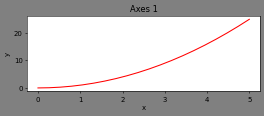

In [61]:
fig, ax = plt.subplots(figsize=(6,2), dpi=50, facecolor='gray')

ax.plot(x, y1, 'r')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Axes 1');

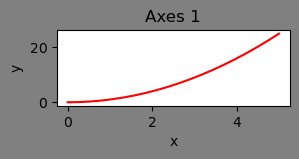

In [62]:
fig, ax = plt.subplots(figsize=(3,1), dpi=100, facecolor='gray')

ax.plot(x, y1, 'r')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Axes 1');

## Различные типы графиков <a class="anchor" id="plot_types"></a>
* [к оглавлению](#разделы)

__Линейная и точенная диаграммы__

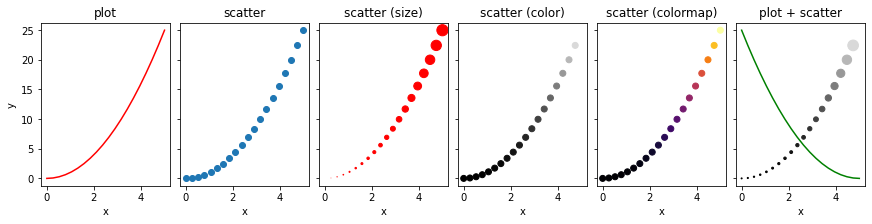

In [236]:
# Для параметров sharey и sharex можно задать значения 'row', 'col', 'all':
fig, (ax0, ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=1, ncols=6, figsize=(12,3), layout="constrained", sharey='row')

ax0.set_ylabel('y')    

#-----
ax0.plot(x, y1, 'r')

ax0.set_xlabel('x')
ax0.set_title('plot')

#-----
# Точечная диаграмма
ax1.scatter(x, y1)

ax1.set_xlabel('x')
ax1.set_title('scatter')

#-----
# Точечная диаграмма с динамчиеским размером точек
ax2.scatter(x, y1, y2, color='r')

ax2.set_xlabel('x')
ax2.set_title('scatter (size)')

#-----
# Точечная диаграмма с динамчиеским цветом точек
ax3.scatter(x, y1, color=[str(c) for c in y2/y2.max()], cmap='inferno')

ax3.set_xlabel('x')
ax3.set_title('scatter (color)')

#-----
# Точечная диаграмма с динамчиеским цветом точек c цветовой картой:
ax4.scatter(x, y1, c=[c for c in y2/y2.max()], cmap='hsv')

ax4.set_xlabel('x')
ax4.set_title('scatter (colormap)')

#-----
# Линейная и точечная диаграмма (с динамчиеским размером и цветом) на одном графике
ax5.plot(x, y1[::-1], 'g')
ax5.scatter(x, y1, y3, color=[str(c) for c in y2/y2.max()])

ax5.set_xlabel('x')
ax5.set_title('plot + scatter');

Построение графика в полярных координатах:

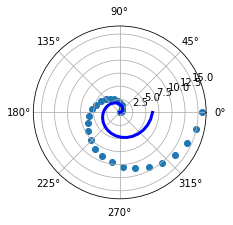

In [237]:
# Данные:
t = np.linspace(0, 2 * np.pi, 30)

fig = plt.figure()
ax = fig.add_axes([0.0, 0.0, .6, .6], polar=True)


ax.plot(t, t, color='blue', lw=3);
ax.scatter(t, t**1.5)


__Линейная и ступенчатая диаграммы__

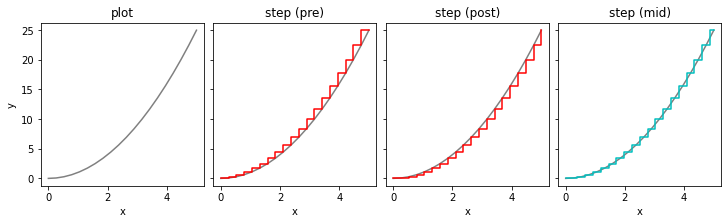

In [65]:
# Для параметров sharey и sharex можно задать значения 'row', 'col', 'all':
fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=4, figsize=(10,3), layout="constrained", sharey='row')

ax0.set_ylabel('y')    

#-----
ax0.plot(x, y1, 'gray')

ax0.set_xlabel('x')
ax0.set_title('plot')

#-----
# Ступнчатая диаграмма, шаг в начале
ax1.plot(x, y1, 'gray')
ax1.step(x, y1, c='r') # where='pre'

ax1.set_xlabel('x')
ax1.set_title('step (pre)')

#-----
# Ступнчатая диаграмма, шаг в конце
ax2.plot(x, y1, 'gray')
ax2.step(x, y1, c='r', where='post') 

ax2.set_xlabel('x')
ax2.set_title('step (post)')

#-----
# Ступнчатая диаграмма, шаг в конце
ax3.plot(x, y1, 'gray')
ax3.step(x, y1, c='c', where='mid') 

ax3.set_xlabel('x')
ax3.set_title('step (mid)');

__Столбчатая диаграмма__

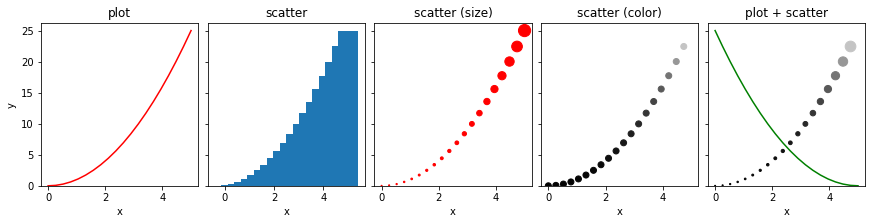

In [66]:
# Для параметров sharey и sharex можно задать значения 'row', 'col', 'all':
fig, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=5, figsize=(12,3), layout="constrained", sharey='row')

ax0.set_ylabel('y')    

#-----
ax0.plot(x, y1, 'r')

ax0.set_xlabel('x')
ax0.set_title('plot')

#-----
# Столбчатая диаграмма
ax1.bar(x, y1)

ax1.set_xlabel('x')
ax1.set_title('scatter')

#-----
# Точечная диаграмма с динамчиеским размером точек
ax2.scatter(x, y1, y3, color='r')

ax2.set_xlabel('x')
ax2.set_title('scatter (size)')

#-----
# Точечная диаграмма с динамчиеским цветом точек
ax3.scatter(x, y1, color=[str(c) for c in y3/y3.max()])

ax3.set_xlabel('x')
ax3.set_title('scatter (color)')

#-----
# Линейная и точечная диаграмма (с динамчиеским размером и цветом) на одном графике
ax4.plot(x, y1[::-1], 'g')
ax4.scatter(x, y1, y3, color=[str(c) for c in y3/y3.max()])

ax4.set_xlabel('x')
ax4.set_title('plot + scatter');

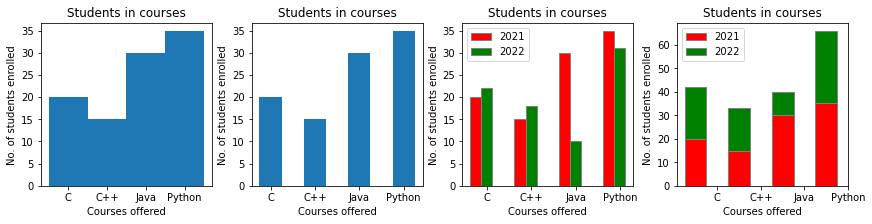

In [240]:
data1 = {'C':20, 'C++':15, 'Java':30, 'Python':35}
data2 = {'C':22, 'C++':18, 'Java':10, 'Python':31}
courses = list(data1.keys())
values1 = list(data1.values())
values2 = list(data2.values())
  
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize=(12,3), layout="constrained")
 
#-----
# Столбчатая диаграмма 1
ax1.bar(courses, values1, width = 1.0)
 
ax1.set_xlabel("Courses offered")
ax1.set_ylabel("No. of students enrolled")
ax1.set_title("Students in courses")

#-----
# Столбчатая диаграмма
ax2.bar(courses, values1, width = 0.5)
 
ax2.set_xlabel("Courses offered")
ax2.set_ylabel("No. of students enrolled")
ax2.set_title("Students in courses")

#-----
# Столбчатая диаграмма со сгруппированными столбцами:

# Устанавка позиции по оси X:
barWidth = 0.25
br1 = np.arange(len(data1))
br2 = [x + barWidth for x in br1]

ax3.bar(br1, values1, width = barWidth, color ='r', edgecolor ='grey', label ='2021')
ax3.bar(br2, values2, width = barWidth, color ='g', edgecolor ='grey', label ='2022')
 
ax3.set_xlabel("Courses offered")
ax3.set_ylabel("No. of students enrolled")
ax3.set_title("Students in courses")
ax3.set_xticks([r + barWidth for r in range(len(data1))], courses)
ax3.legend()

#-----
# Столбчатая диаграмма со столбцами с накоплением:

# Устанавка позиции по оси X:
barWidth = 0.5
# br1 = np.arange(len(data1))
# br2 = [x + barWidth for x in br1]

ax4.bar(courses, values1, width = barWidth, color ='r', label ='2021', edgecolor ='grey')
ax4.bar(courses, values2, width = barWidth, color ='g', bottom = values1, label ='2022', edgecolor ='grey')
 
ax4.set_xlabel("Courses offered")
ax4.set_ylabel("No. of students enrolled")
ax4.set_title("Students in courses")
ax4.set_xticks([r + barWidth for r in range(len(data1))], courses)
ax4.legend()

__Цветовая сетка__

Цветовая сетка представляет собой поле, заполненное цветом, который определяется заданной цветовой картой и численными значениями элементов переданного двумерного массива. 

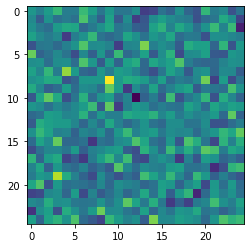

In [241]:
np.random.seed(42)
data = np.random.randn(25, 25)
plt.imshow(data)

Некоторые параметры функции:
* `cmap`: str или Colormap, optional - Цветовая карта изображения.
* `aspect`: {‘equal’, ‘auto’} или float, optional - 
    * ‘equal’: обеспечивает соотношение сторон равное 1. 
    * ‘auto’: соотношение не изменяется. 
* `origin`: {‘upper’, ‘lower’}, optional - Расположение начал координат – точки `[0,0]`: `upper` – верхний левый, `lower` – нижний левый угол координатной плоскости.    
* `interpolation`: str, optional - Алгоритм интерполяции, доступны следующие значения: ‘none’, ‘nearest’, ‘bilinear’, ‘bicubic’, ‘spline16’, ‘spline36’, ‘hanning’, ‘hamming’, ‘hermite’, ‘kaiser’, ‘quadric’, ‘catrom’, ‘gaussian’, ‘bessel’, ‘mitchell’, ‘sinc’, ‘lanczos’.
* `extent` : scalars (left, right, bottom, top), optional - Изменение размеров изображения вдоль осей x, y.

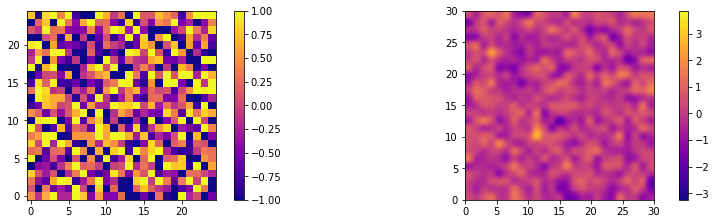

In [242]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(12,3), layout="constrained")

p0 = ax0.imshow(data, cmap='plasma', aspect='equal', vmin=-1, vmax=1, origin="lower")
fig.colorbar(p0, ax=ax0)

p1 = ax1.imshow(data, cmap='plasma', aspect='equal', interpolation='gaussian', origin="lower", extent=(0, 30, 0, 30))
fig.colorbar(p1, ax=ax1);

__Визуализация функций двух переменных, трехмерные графики__

In [73]:
# Пример. Задание функции двух переменных:

alpha = 0.7
phi_ext = 2 * np.pi * 0.5

def flux_qubit_potential(phi_m, phi_p):
    return 2 + alpha - 2 * np.cos(phi_p) * np.cos(phi_m) - alpha * np.cos(phi_ext - 2*phi_p)

Создание двухмерной решетки

`numpy.meshgrid(*xi, copy=True, sparse=False, indexing='xy')` - создает матрицы координат на основе векторов координат.

In [74]:
# пример:
nx, ny = (3, 2)
x = np.linspace(0, 1, nx)
y = np.linspace(0, 1, ny)
print(f'x:{x} \ny:{y}')

x:[0.  0.5 1. ] 
y:[0. 1.]


In [75]:
xv, yv = np.meshgrid(x, y)
print(f'xv:{xv} \nyv:{yv}')

xv:[[0.  0.5 1. ]
 [0.  0.5 1. ]] 
yv:[[0. 0. 0.]
 [1. 1. 1.]]


In [243]:
# Расчет значений функции flux_qubit_potential на двухмерной решетке:
n_qty = 50
phi_m = np.linspace(0, 2*np.pi, n_qty)
phi_p = np.linspace(0, 2*np.pi, n_qty)

X, Y = np.meshgrid(phi_p, phi_m)
Z = flux_qubit_potential(X, Y).T

In [244]:
Z.shape

(50, 50)

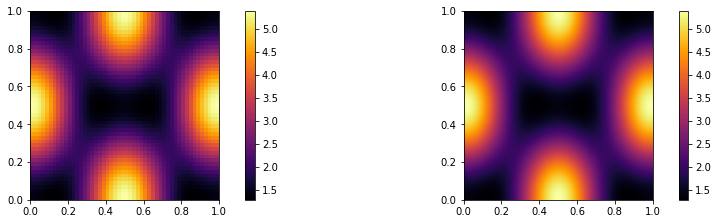

In [78]:
# Изображение функции двух координат с помощью цветовой сетки:

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(12,3), layout="constrained")

im0 = ax0.imshow(Z, cmap=matplotlib.cm.inferno, vmin=abs(Z).min(), vmax=abs(Z).max(), 
               extent=[0, 1, 0, 1])
cb0 = fig.colorbar(im0, ax=ax0)

im1 = ax1.imshow(Z, cmap=matplotlib.cm.inferno, vmin=abs(Z).min(), vmax=abs(Z).max(), 
               interpolation='gaussian', extent=[0, 1, 0, 1])
cb1 = fig.colorbar(im1, ax=ax1)

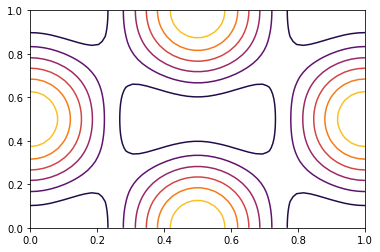

In [79]:
# Изображение функции двух координат с помощью линий уровня:

fig, ax = plt.subplots()
cnt = ax.contour(Z, cmap=matplotlib.cm.inferno, vmin=abs(Z).min(), vmax=abs(Z).max(), extent=[0, 1, 0, 1])

Изображение функий двух переменных с помощью трехмерных графиков.

In [80]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

Рисование с помощью `plot_wireframe` и `plot_surface` на трехмерной системе координат:

</br>
<center>         
    <img src="./img/L6_subplot.png" alt="" style="width: 250px;"/>
    <b>3 первых позиционных аргумента add_subplot</b>
</center>

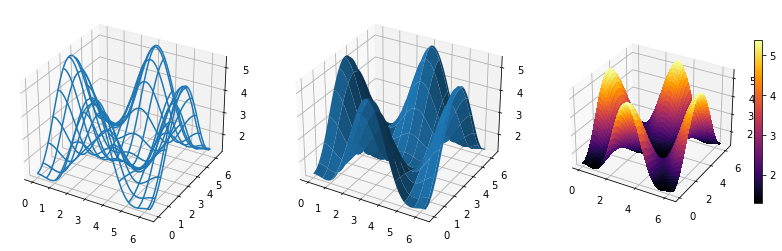

In [81]:
fig = plt.figure(figsize=(14,6))

ax0 = fig.add_subplot(1, 3, 1, projection='3d')
p = ax0.plot_wireframe(X, Y, Z, rstride=4, cstride=4)


# Создание трехмерной системы координат для `ax` с помощью projection='3d':
ax1 = fig.add_subplot(1, 3, 2, projection='3d')
p = ax1.plot_surface(X, Y, Z, rstride=4, cstride=4, linewidth=0)

# surface_plot с цветовым градиентов и шкалой цвета:
ax2 = fig.add_subplot(1, 3, 3, projection='3d')
p = ax2.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=matplotlib.cm.inferno, linewidth=0, antialiased=False)
cb = fig.colorbar(p, shrink=0.5)

# Визуализация с помощью Pandas <a class="anchor" id="pandas"></a>
* [к оглавлению](#разделы)

In [247]:
import pandas as pd

df_exercises = pd.read_csv('data.csv')
df_exercises.head()

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0


In [248]:
df_exercises.describe()

,Duration,Pulse,Maxpulse,Calories
count,169.000000,169.000000,169.000000,164.000000
mean,63.846154,107.461538,134.047337,375.790244
std,42.299949,14.510259,16.450434,266.379919
min,15.000000,80.000000,100.000000,50.300000
25%,45.000000,100.000000,124.000000,250.925000
50%,60.000000,105.000000,131.000000,318.600000
75%,60.000000,111.000000,141.000000,387.600000
max,300.000000,159.000000,184.000000,1860.400000


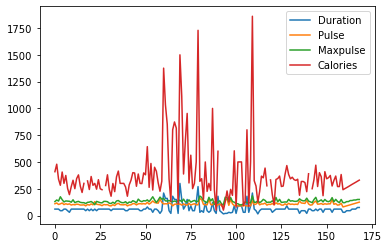

In [251]:
# визуализация данных dataframe в одну строку:
df_exercises.plot();

<AxesSubplot:xlabel='Duration', ylabel='Calories'>

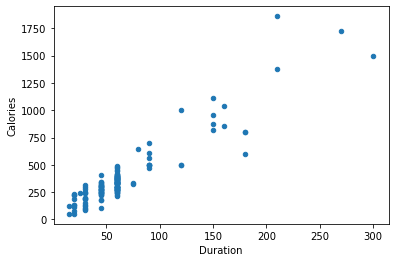

In [252]:
# Точечная диаграмма по выбранным осям:
df_exercises.plot(kind = 'scatter', x = 'Duration', y = 'Calories')

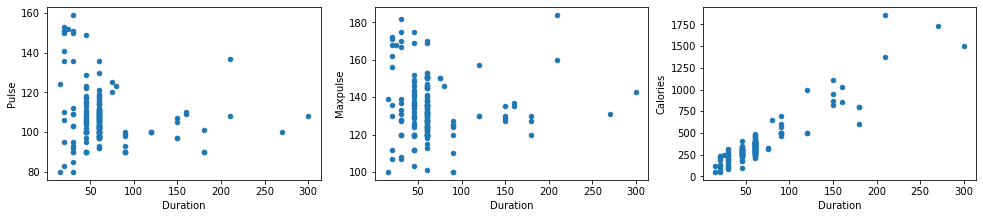

In [253]:
fig = plt.figure(figsize=(12,3))

ax0 = fig.add_subplot(1, 3, 1)
df_exercises.plot(ax=ax0, kind = 'scatter', x = 'Duration', y = 'Pulse')

ax1 = fig.add_subplot(1, 3, 2)
df_exercises.plot(ax=ax1, kind = 'scatter', x = 'Duration', y = 'Maxpulse')

ax2 = fig.add_subplot(1, 3, 3)
df_exercises.plot(ax=ax2, kind = 'scatter', x = 'Duration', y = 'Calories');

# Для обеспечения отступов для название вертикальных осей:
plt.subplots_adjust(bottom=0.1, right=1.2, top=0.9)

Визуализация информации о столбце:

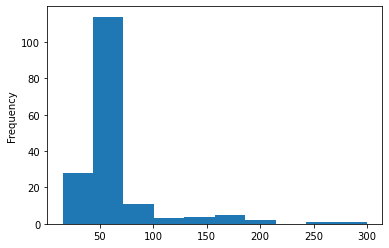

In [254]:
# столбчатая диаграмма:
df_exercises["Duration"].plot(kind = 'hist');

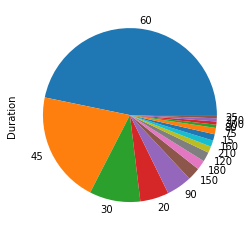

In [88]:
# круговая диаграмма:
df_exercises.Duration.value_counts().plot(kind='pie');

# Разведочный анализ данных и визуализация с помощью Seaborn <a class="anchor" id="dea"></a>
* [к оглавлению](#разделы)

## Знакомство с разведочным анализом данных <a class="anchor" id="dea_intro"></a>
* [к оглавлению](#разделы)

__Разведочный анализ данных__

__Разведочный анализ данных__ (Exploratory Data Analysis (EDA)) - анализ основных свойств данных, нахождение в них общих закономерностей, распределений и аномалий, построение начальных моделей, зачастую с использованием инструментов визуализации.

Разведочный анализ данных включает:
* максимальное «проникновение» в данные, их понимание
* выявление основных структур
* обнаружение отклонений и аномалий
* выбор наиболее важных переменных
* проверку основных гипотез
* разработку начальных моделей.

Изучение признков:
1. Изучение целевого признака.
2. Изучение объясняющих признаков.
3. Изучение взаимосвязей признаков и их влияния на целевой признак.

Этапы изучения признака:
1. Анализ распределения признака.
2. Анализ мер центральной тенденции.
3. Поиск выбросов и пропусков.
4. Анализ взаимного распределения и парных корреляций.
5. Генерация новых признаков.

__Типы признаков__

<center>         
    <img src="./img/L5_p_type.png" alt="" style="width: 500px;"/>
    <b>Типичные виды корреляции</b>
</center>
</br>

*  __Количественные признаки__ (quantitative) определяются путем измерения и выражаются числами. Значения количественных признаков могут быть __непрерывными__ или __дискретными__.
    * __Дискретные__ (discrete) – признаки, значения которых отличаются не менее чем на единицу измерения признака.
        * _Например: число человек в семье, возраст в годах._
    * __Непрерывные__ (continuous) – признаки, значения которых могут отличаться друг от друга на любую сколь угодно малую величину.
        * _Например: высота дерева, вес яблока._
        
        
* __Качественные признаки__ (qualitative) - опрделяются описательным путём и отражают свойство или качество объектов.
    * __Ординарные (порядковые) признаки__ (ordinal) - признаки измеряемые в __ординалъной шкале__, могут быть __упорядочены__, т.е. расположены по возрастанию или убыванию. 
        * Для __представления ординальных признаков в числовой форме__ все значения признака записываются в порядке возрастания начиная с 1 и каждому значению ставится в соответствие натуральное число, равное его номеру в ряду. Это число называется __рангом__. 
        * Для признаков, измеряемых в ординальных шкалах, __операции сложения и вычитания не имеют смысла__, т.к. неизвестно соотноешние разницы между хорошим и удовлетворительным и разницой между удовлетоврительным и плохим.
        * _Например: оцена условий жизни (плохое, удовлетворительное, хорошее, очень хорошее)._        
    * __Номинальные признаки__ (nominal) - качественные признаки, которые не могут быть упорядочены.
        * _Например: порода собак, цвет глаз._

<center>         
    <img src="./img/L5_todo.png" alt="" style="width: 900px;"/>
    <b>Выбор способа визуализации данных в зависимости от рассматриваемой задачи</b>
</center>
</br>

## Анализ распределения <a class="pandas" id="dea_intro"></a>
* [к оглавлению](#distr)

__Seaborn__ — это библиотека визуализации данных в Python, основанная на matplotlib. Он апредоставляет высокоуровневый интерфейс для рисования привлекательных и информативных статистических графиков.
* Seaborn позволяет __быстро рисовать сложные и привлекательные визуализации__.
* __Гибкость настройки__ визуализации Seaborn __уступает таковой у matplotlib__, лежащей в ее основе.

In [101]:
import seaborn as sns

Подготовка данных:

In [103]:
df_exercises.head()

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0


__Диаграмма displot__

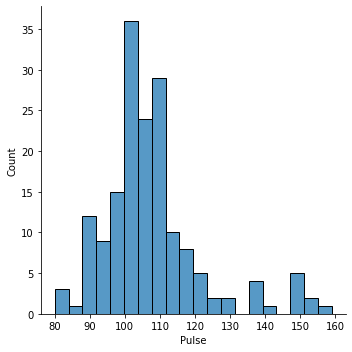

In [106]:
sns.displot(df_exercises, x="Pulse");

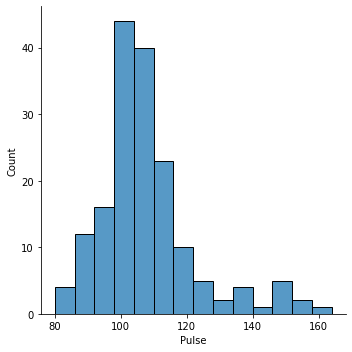

In [257]:
# ручное задание ширины корзины:
sns.displot(df_exercises, x="Pulse", binwidth=6);

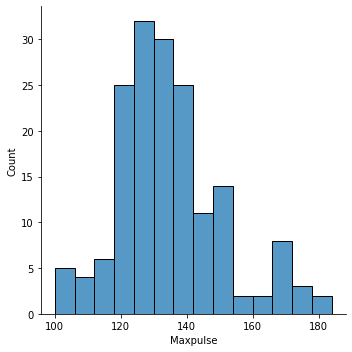

In [113]:
sns.displot(df_exercises, x="Maxpulse");

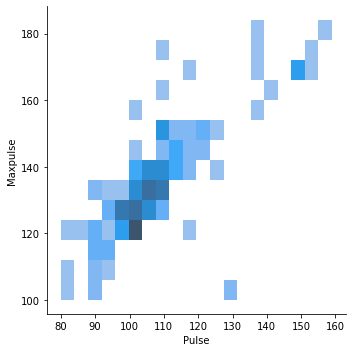

In [258]:
# двухмерное распредление для Pulse и Maxpulse:
sns.displot(df_exercises, x="Pulse", y="Maxpulse");

In [259]:
df_med_ex = df_exercises[(df_exercises.Duration >= 45) & (df_exercises.Duration <= 90)]
df_med_ex = df_med_ex.assign(Highpulse = df_med_ex.Maxpulse > 120)
df_med_ex.head()

,Duration,Pulse,Maxpulse,Calories,Highpulse
0,60,110,130,409.1,True
1,60,117,145,479.0,True
2,60,103,135,340.0,True
3,45,109,175,282.4,True
4,45,117,148,406.0,True


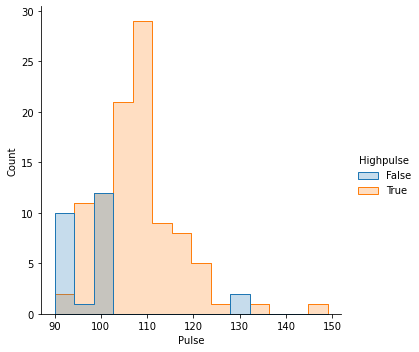

In [120]:
sns.displot(df_med_ex, x="Pulse", hue="Highpulse", element="step");

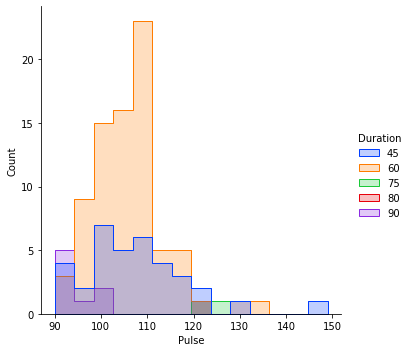

In [122]:
sns.displot(df_med_ex, x="Pulse", hue="Duration", element="step", palette='bright');

Построение непрерывного графика распределения с помощью KDE (Kernel density estimation). 

Вместо использования дискретных интервалов график KDE сглаживает наблюдения с помощью ядра Гаусса, создавая непрерывную оценку плотности.

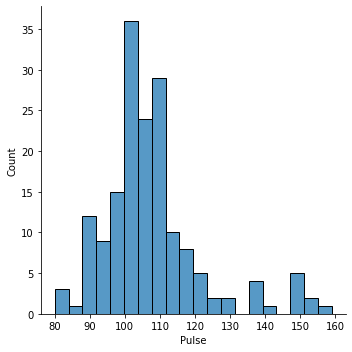

In [260]:
sns.displot(df_exercises, x="Pulse");

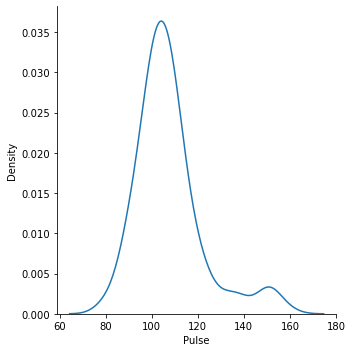

In [124]:
sns.displot(df_exercises, x="Pulse", kind="kde");

С помощью параметра `bw_adjust` можно управлять шириной окна сглаживания:

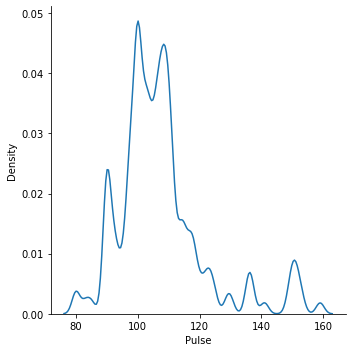

In [261]:
sns.displot(df_exercises, x="Pulse", kind="kde", bw_adjust=0.25);

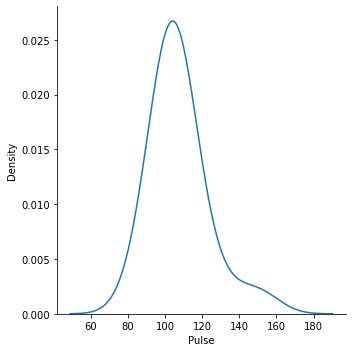

In [262]:
sns.displot(df_exercises, x="Pulse", kind="kde", bw_adjust=2.0);

Метод сглаживания с помощью KDE полхо подходит для данных с малым числом наблюдений:

C:\Users\alpha\.conda\envs\teach_e2\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


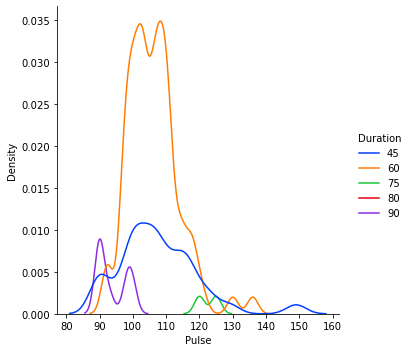

In [264]:
sns.displot(df_med_ex, x="Pulse", hue="Duration", palette='bright', kind="kde", bw_adjust=0.5);

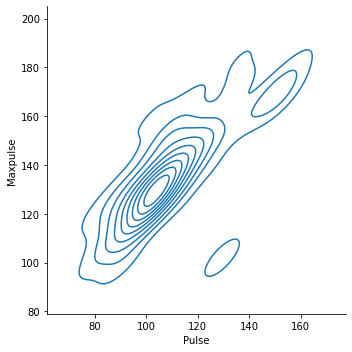

In [265]:
# двухмерное распредление для Pulse и Maxpulse:
sns.displot(df_exercises, x="Pulse", y="Maxpulse", kind="kde");

C:\Users\alpha\.conda\envs\teach_e2\lib\site-packages\seaborn\distributions.py:1106: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\alpha\.conda\envs\teach_e2\lib\site-packages\seaborn\distributions.py:1106: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


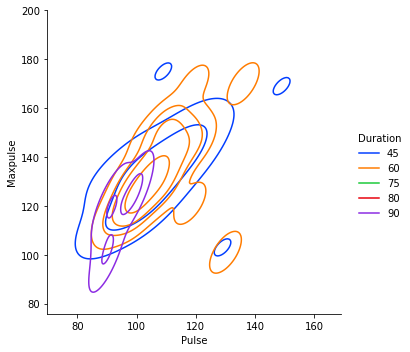

In [266]:
# двухмерное распредление для Pulse и Maxpulse:
sns.displot(df_med_ex, x="Pulse", y="Maxpulse", hue="Duration", palette='bright', kind="kde", levels=5);

## Анализ мер центральной тенденции и поиск выбросов <a class="anchor" id="outl"></a>
* [к оглавлению](#разделы)

__Диаграмма boxplot ("ящик с усами")__

__Квантиль и медиана__

__Квантиль__ в математической статистике — значение, которое заданная случайная величина не превышает с фиксированной вероятностью.
* Если вероятность задана в процентах, то квантиль называется __процентилем__ или __перцентилем__.

__Квартили и медиана__:
* __0,25-квантиль__ называется __первым квартилем__ (от лат. quarta — четверть).
* __0,5-квантиль__ называется __медианой__ (от лат. mediāna — середина) или вторым кварти́лем.
* __0,75-квантиль__ называется __третьим квартилем__.

<center>         
    <img src="./img/L5_qt.png" alt="" style="width: 400px;"/>
    <b>Пример определения квантилей</b>
</center>
</br>

Если упорядочить данные по величине, начиная с самой маленькой величины и заканчивая самой большой, то медиана то медиана будет делить ряд упорядоченных значений пополам с равным числом этих значений как выше, так и ниже ее.
* Вычислить медиану легко, если __число наблюдений $n$ нечетное__. Это будет наблюдение номер $(n + 1)/2$ в нашем упорядоченном наборе данных.
* Если $n$ __четное__, то ее вычисляют как __среднее арифметическое двух соседних средних наблюдений__ в упорядоченном наборе данных т. е. наблюдений номер $(n/2)$ и $(n/2 + 1)$.

__Описательные статистики: среднее, мода, медиана__


<center>         
    <img src="./img/L5_mma.png" alt="" style="width: 350px;"/>
    <b>Принцип определения среднего, моды и медианы</b>
</center>
</br>

__Мода__ — точка, в которой плотность распределения достигает локального максимума.

<center>         
    <img src="./img/L5_mma2.png" alt="" style="width: 450px;"/>
    <b>Смещения среднего, моды и медианы в зависимости от формы распределения</b>
</center>
</br>


<center>         
    <img src="./img/L5_mma3.png" alt="" style="width: 400px;"/>
    <b>Среднее значение более чувствительно к выбросам, чем медиана</b>
</center>
</br>

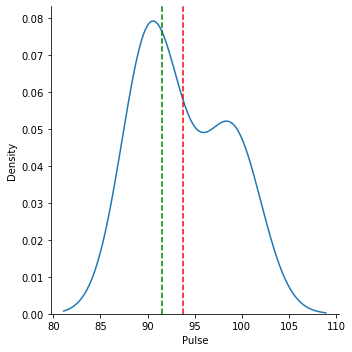

In [267]:
# df_ex_60 = df_exercises[df_exercises.Duration == 60]
df_ex_90 = df_exercises[df_exercises.Duration == 90]

sns.displot(df_ex_90, x="Pulse", kind="kde")
plt.axvline(x=df_ex_90.Pulse.mean(),
            color='red', ls='--')
plt.axvline(x=df_ex_90.Pulse.median(),
            color='green', ls='--')

<center>         
    <img src="./img/L5_box.png" alt="" style="width: 600px;"/>
    <b>Интерквартильный размах и "ящик с усами" (boxplot)</b>
</center>
</br>

__Интерквартильным размахом__ (Interquartile range) называется __разность между третьим и первым квартилями__.
* Интерквартильный размах является характеристикой разброса распределения величины и является робастным аналогом дисперсии. Вместе, медиана и интерквартильный размах могут быть использованы вместо математического ожидания и дисперсии.

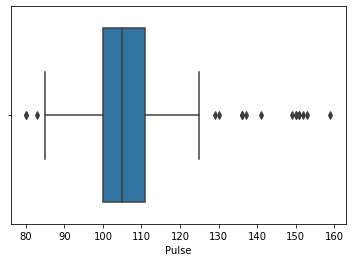

In [268]:
sns.boxplot(data=df_exercises, x="Pulse");

__Выбросы__

__Выброс__ (в статистике) — это наблюдение, которое значительно выделяется из общей выборки. 
* Выбросы могут быть вызваны:
    * вариативностью измерений 
    * ошибками (экспериментальными, сбора и фиксации данных и т.д.).
* В последнем случае выбросы могут исключаются из набора данных.
* Выбросы можгут вызвать серьезные проблемы при статистическом анализе.

<center>         
    <img src="./img/L5_out.png" alt="" style="width: 500px;"/>
    <b>Влияние выбросов на статистический анализ распределения</b>
</center>
</br>

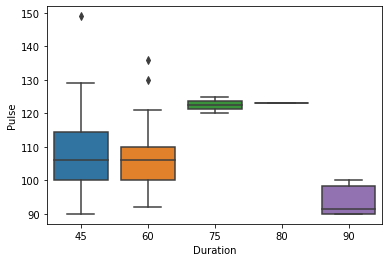

In [144]:
sns.boxplot(data=df_med_ex, x="Duration", y="Pulse");

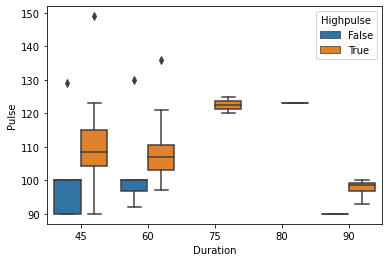

In [145]:
sns.boxplot(data=df_med_ex, x="Duration", y="Pulse", hue="Highpulse");

__violinplot__

Диаграмма violinplot совмещает логику визуализации "ящика с усами" (boxplot) со сглаженной визуализацией распределения.

https://seaborn.pydata.org/generated/seaborn.violinplot.html

In [146]:
# df_exercises

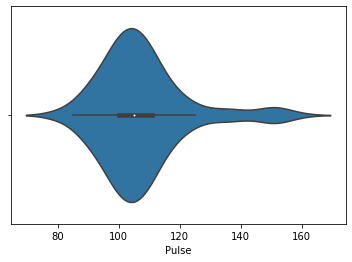

In [147]:
sns.violinplot(x=df_exercises["Pulse"]);

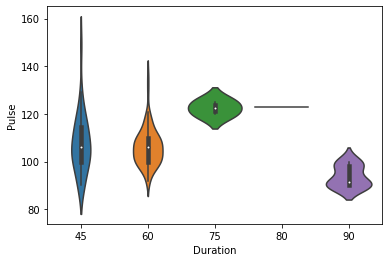

In [149]:
sns.violinplot(data=df_med_ex, x="Duration", y="Pulse");

In [150]:
df_med_ex = df_med_ex.assign(Highpulse = df_med_ex.Maxpulse > 120)
df_med_ex.head()

,Duration,Pulse,Maxpulse,Calories,Highpulse
0,60,110,130,409.1,True
1,60,117,145,479.0,True
2,60,103,135,340.0,True
3,45,109,175,282.4,True
4,45,117,148,406.0,True


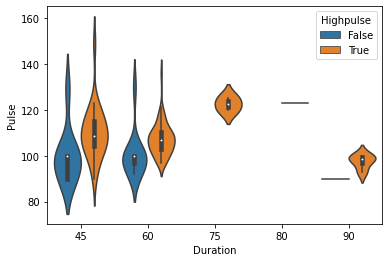

In [151]:
sns.violinplot(data=df_med_ex, x="Duration", y="Pulse", hue="Highpulse");

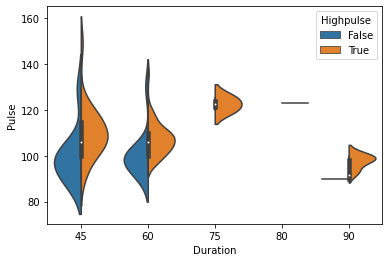

In [152]:
sns.violinplot(data=df_med_ex, x="Duration", y="Pulse", hue="Highpulse", split=True);

## Анализ взаимного распределения и парных корреляций <a class="anchor" id="corell"></a>
* [к оглавлению](#разделы)

__seaborn.pairplot__

https://seaborn.pydata.org/generated/seaborn.pairplot.html#seaborn.pairplot

In [153]:
df_med_ex = df_exercises[(df_exercises.Duration >= 45) & (df_exercises.Duration <= 90)]

In [154]:
df_med_ex.head()

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0


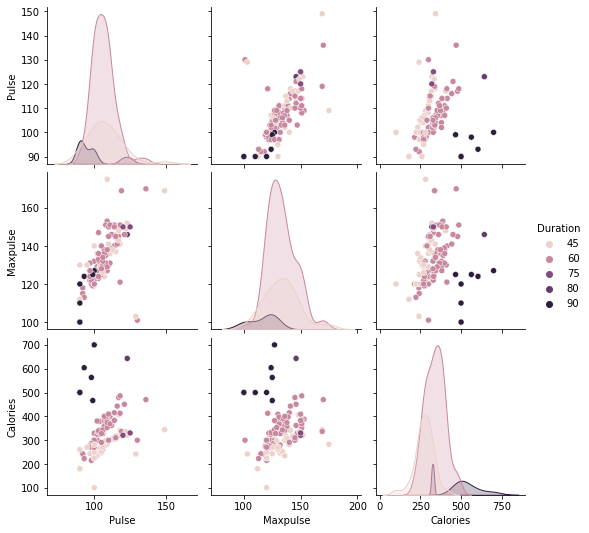

In [155]:
sns.pairplot(df_med_ex, hue="Duration");

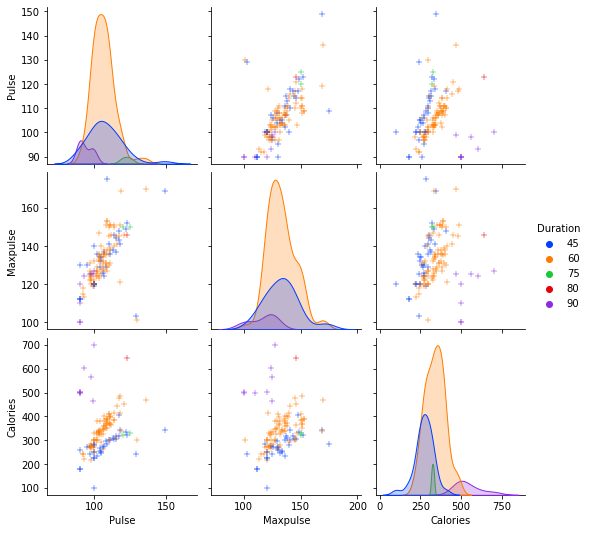

In [156]:
sns.pairplot(df_med_ex, hue="Duration", palette='bright',  plot_kws=dict(marker="+"));

__Оценка корреляции величин__

__Корреляция__ — статистическая взаимосвязь двух или более случайных величин, при этом изменения значений одной (нескольких) из этих величин сопутствуют систематическому изменению значений другой (других) величины.

<center>         
    <img src="./img/L5_cor.png" alt="" style="width: 500px;"/>
    <b>Типичные виды корреляции</b>
</center>
</br>

<center>         
    <img src="./img/L5_cor2.png" alt="" style="width: 500px;"/>
    <b>Сила линейной связи величин и корреляция</b>
</center>
</br>

Близкая к 0 корреляция говорит только об отсутствии __линейной зависимости__, при этом может быть сильная нелинейная зависимость.

__seaborn.heatmap__

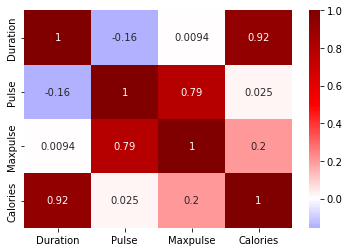

In [270]:
dataplot=sns.heatmap(df_exercises.corr(), cmap='seismic', center=0.0, annot = True)

__seaborn.jointplot__

https://seaborn.pydata.org/generated/seaborn.jointplot.html

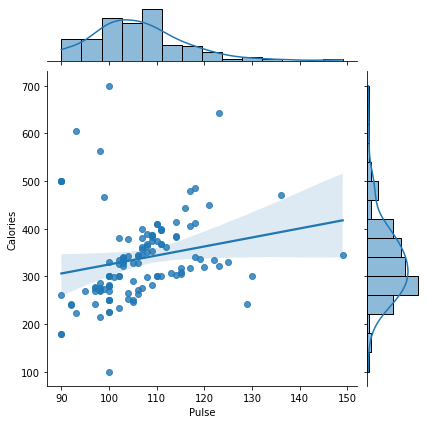

In [157]:
sns.jointplot(data=df_med_ex, x="Pulse", y="Calories", kind="reg");

In [158]:
df_med_ex_60 = df_med_ex[df_med_ex.Duration == 60]

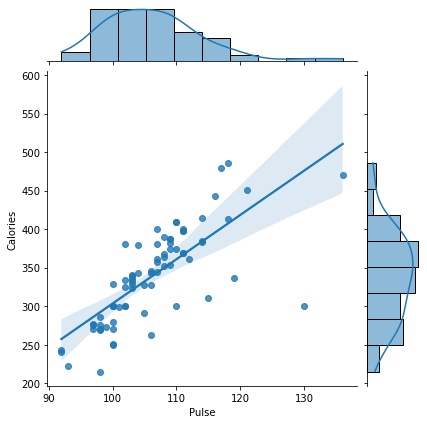

In [159]:
sns.jointplot(data=df_med_ex_60, x="Pulse", y="Calories", kind="reg");

---

# Спасибо за внимание!

__seaborn.heatmap__

In [160]:
df_exercises

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
...,...,...,...,...
164,60,105,140,290.8
165,60,110,145,300.0
166,60,115,145,310.2
167,75,120,150,320.4


In [162]:
# Бьем пульс на 10 корзин (категорий):
bins_pulse = pd.cut(df_exercises['Pulse'], bins=10)
bins_pulse

0      (103.7, 111.6]
1      (111.6, 119.5]
2       (95.8, 103.7]
3      (103.7, 111.6]
4      (111.6, 119.5]
            ...      
164    (103.7, 111.6]
165    (103.7, 111.6]
166    (111.6, 119.5]
167    (119.5, 127.4]
168    (119.5, 127.4]
Name: Pulse, Length: 169, dtype: category
Categories (10, interval[float64, right]): [(79.921, 87.9] < (87.9, 95.8] < (95.8, 103.7] < (103.7, 111.6] ... (127.4, 135.3] < (135.3, 143.2] < (143.2, 151.1] < (151.1, 159.0]]

In [164]:
# Бьем максимальный пульс на 10 корзин (категорий):
bins_mpulse = pd.cut(df_exercises['Maxpulse'], bins=10)
bins_mpulse

0      (125.2, 133.6]
1      (142.0, 150.4]
2      (133.6, 142.0]
3      (167.2, 175.6]
4      (142.0, 150.4]
            ...      
164    (133.6, 142.0]
165    (142.0, 150.4]
166    (142.0, 150.4]
167    (142.0, 150.4]
168    (142.0, 150.4]
Name: Maxpulse, Length: 169, dtype: category
Categories (10, interval[float64, right]): [(99.916, 108.4] < (108.4, 116.8] < (116.8, 125.2] < (125.2, 133.6] ... (150.4, 158.8] < (158.8, 167.2] < (167.2, 175.6] < (175.6, 184.0]]

In [165]:
df_exer_gr = df_exercises.groupby([bins_pulse, bins_mpulse])['Duration'].count().reset_index()
df_exer_gr

,Pulse,Maxpulse,Duration
0,"(79.921, 87.9]","(99.916, 108.4]",2
1,"(79.921, 87.9]","(108.4, 116.8]",0
2,"(79.921, 87.9]","(116.8, 125.2]",2
3,"(79.921, 87.9]","(125.2, 133.6]",0
4,"(79.921, 87.9]","(133.6, 142.0]",0
...,...,...,...
95,"(151.1, 159.0]","(142.0, 150.4]",0
96,"(151.1, 159.0]","(150.4, 158.8]",0
97,"(151.1, 159.0]","(158.8, 167.2]",0
98,"(151.1, 159.0]","(167.2, 175.6]",2


In [166]:
piv_exer = df_exer_gr.pivot(index='Pulse', columns='Maxpulse')
piv_exer

Duration                                               \
Maxpulse       (99.916, 108.4] (108.4, 116.8] (116.8, 125.2] (125.2, 133.6]   
Pulse                                                                         
(79.921, 87.9]               2              0              2              0   
(87.9, 95.8]                 4              7              5              5   
(95.8, 103.7]                0              0             26             18   
(103.7, 111.6]               0              0              2             20   
(111.6, 119.5]               0              0              1              0   
(119.5, 127.4]               0              0              0              0   
(127.4, 135.3]               2              0              0              0   
(135.3, 143.2]               0              0              0              0   
(143.2, 151.1]               0              0              0              0   
(151.1, 159.0]               0              0              0              0   

                                                                            \
Maxpulse       (133.6, 142.0] (142.0, 150.4] (150.4, 158.8] (158.8, 167.2]   
Pulse                                                                        
(79.921, 87.9]              0              0              0              0   
(87.9, 95.8]                0              0              0              0   
(95.8, 103.7]               5              1              1              0   
(103.7, 111.6]             21              3              5              1   
(111.6, 119.5]              6              8              2              0   
(119.5, 127.4]              1              5              1              0   
(127.4, 135.3]              0              0              0              0   
(135.3, 143.2]              0              0              1              1   
(143.2, 151.1]              0              0              0              1   
(151.1, 159.0]              0              0              0              0   

                                              
Maxpulse       (167.2, 175.6] (175.6, 184.0]  
Pulse                                         
(79.921, 87.9]              0              0  
(87.9, 95.8]                0              0  
(95.8, 103.7]               0              0  
(103.7, 111.6]              1              0  
(111.6, 119.5]              1              0  
(119.5, 127.4]              0              0  
(127.4, 135.3]              0              0  
(135.3, 143.2]              2              1  
(143.2, 151.1]              4              0  
(151.1, 159.0]              2              1

In [167]:
piv_exer.sum().sum()

169

<AxesSubplot:xlabel='None-Maxpulse', ylabel='Pulse'>

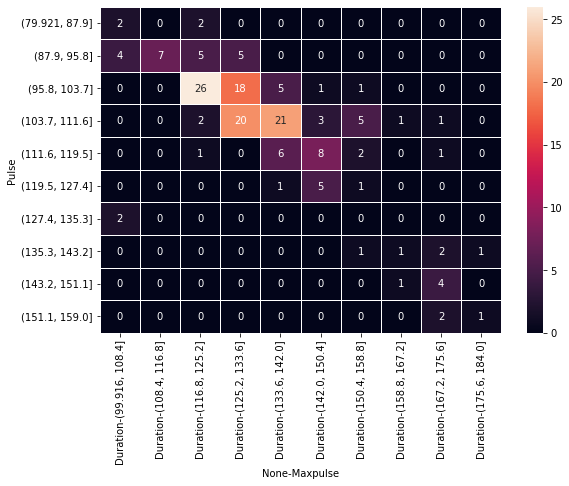

In [168]:
f, ax = plt.subplots(figsize=(9, 6))
# sns.heatmap(piv_exer, annot=True, fmt="d", linewidths=.5, ax=ax)
sns.heatmap(piv_exer, annot=True, linewidths=.5, ax=ax)